In [2]:
import numpy as np

In [3]:
import pandas as pd

In [29]:
patient_data= pd.read_csv('./data/einstein_full_dataset_covid/einstein_full_dataset_paciente.csv',sep='|')
del patient_data['cd_pais']
del patient_data['cd_uf']
del patient_data['cd_municipio']
del patient_data['cd_cep']

In [34]:
def to_age(year):
    if year == 'AAAA': return 100
    else: return pd.Timestamp('now').year - int(year)
patient_data['age'] = patient_data['aa_nascimento'].apply(to_age)

In [35]:
patient_data.head()

,id_paciente,ic_sexo,aa_nascimento,age
0,1e5b27a1ca443075160da7be8a93f977038f277a,M,1978,42
1,17435b27462b2e3824596f0b72c9646e15fba829,M,1982,38
2,8b09117dc5e21e8b790296a8a4f5aa599ffe6eb8,F,1988,32
3,0c275fa49e292b2f9a9bf9f7cbd83d1351fdd80f,M,1985,35
4,b08928a65064fb16e2b2ce347949a485fc52cd75,M,1973,47


In [36]:
patient_data['ic_sexo'].value_counts()

F    22906
M    20656
Name: ic_sexo, dtype: int64

In [37]:
patient_data['age'].value_counts()

38    1453
39    1435
37    1334
40    1303
36    1275
      ... 
84      66
86      66
89      59
87      55
88      52
Name: age, Length: 91, dtype: int64

In [116]:
sns.set(style="whitegrid")

ranges = [0,10,20,30,40,50,60,70,80,90,100]
g = sns.catplot(x="age", y="total", hue="ic_sexo", data=patient_data,
                height=6, kind="bar", palette="muted")
patient_data.groupby(pd.cut(patient_data['age'], ranges)).count()
g.despine(left=True)
g.set_ylabels("survival probability")

ValueError: Could not interpret input 'total'

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:

ranges = [0,10,20,30,40,50,60,70,80,90,100]
grouped_data = patient_data.groupby([pd.cut(patient_data['age'], ranges), 'ic_sexo'])['age'].count()

In [85]:
grouped_data

age        ic_sexo
(0, 10]    F           965
           M          1153
(10, 20]   F          1050
           M          1016
(20, 30]   F          3668
           M          3101
(30, 40]   F          6845
           M          5594
(40, 50]   F          4934
           M          4648
(50, 60]   F          2626
           M          2613
(60, 70]   F          1439
           M          1351
(70, 80]   F           691
           M           729
(80, 90]   F           376
           M           273
(90, 100]  F           264
           M           116
Name: age, dtype: int64

In [94]:
for index, value in grouped_data.items():
    print(f"Index : {index}, Value : {value}")

Index : (Interval(0, 10, closed='right'), 'F'), Value : 965
Index : (Interval(0, 10, closed='right'), 'M'), Value : 1153
Index : (Interval(10, 20, closed='right'), 'F'), Value : 1050
Index : (Interval(10, 20, closed='right'), 'M'), Value : 1016
Index : (Interval(20, 30, closed='right'), 'F'), Value : 3668
Index : (Interval(20, 30, closed='right'), 'M'), Value : 3101
Index : (Interval(30, 40, closed='right'), 'F'), Value : 6845
Index : (Interval(30, 40, closed='right'), 'M'), Value : 5594
Index : (Interval(40, 50, closed='right'), 'F'), Value : 4934
Index : (Interval(40, 50, closed='right'), 'M'), Value : 4648
Index : (Interval(50, 60, closed='right'), 'F'), Value : 2626
Index : (Interval(50, 60, closed='right'), 'M'), Value : 2613
Index : (Interval(60, 70, closed='right'), 'F'), Value : 1439
Index : (Interval(60, 70, closed='right'), 'M'), Value : 1351
Index : (Interval(70, 80, closed='right'), 'F'), Value : 691
Index : (Interval(70, 80, closed='right'), 'M'), Value : 729
Index : (Inte

In [100]:
intervals = []
man = []
woman = []
indx = 0
for index, value in grouped_data.items():
    interval, sex = index
    if (indx % 2 == 0):
        intervals.append(interval)
    if sex == 'F':
        woman.append(value)
    if sex == 'M':
        man.append(value)
    indx += 1 
age_sex = {'age': intervals, 'man': man, 'woman': woman}

In [101]:
age_sex

{'age': [Interval(0, 10, closed='right'),
  Interval(10, 20, closed='right'),
  Interval(20, 30, closed='right'),
  Interval(30, 40, closed='right'),
  Interval(40, 50, closed='right'),
  Interval(50, 60, closed='right'),
  Interval(60, 70, closed='right'),
  Interval(70, 80, closed='right'),
  Interval(80, 90, closed='right'),
  Interval(90, 100, closed='right')],
 'man': [1153, 1016, 3101, 5594, 4648, 2613, 1351, 729, 273, 116],
 'woman': [965, 1050, 3668, 6845, 4934, 2626, 1439, 691, 376, 264]}

In [108]:
age_sex = pd.DataFrame(data=age_sex)

In [125]:

age_sex['total'] = age_sex.woman + age_sex.man 

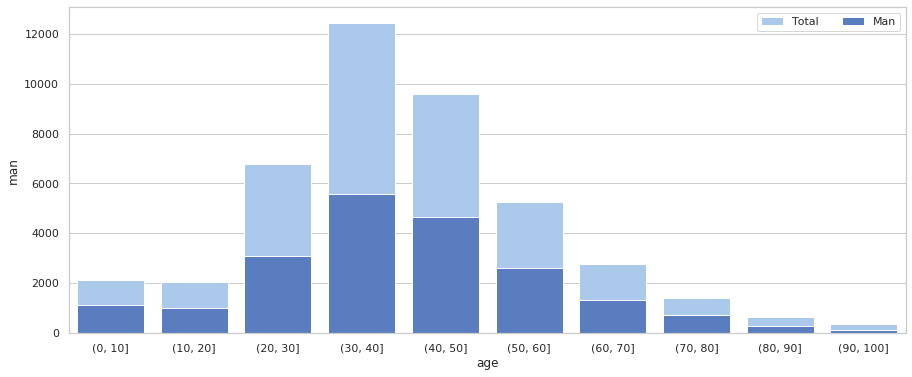

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 6))

# Load the example car crash dataset

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="age", y="total", data=age_sex, label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="age", y="man", data=age_sex, label="Man", color="b")

ax.legend(ncol=2, frameon=True)

In [138]:
intervals = []
genders = []
counts = []
for index, value in grouped_data.items():
    interval, gender = index
    intervals.append(interval)
    genders.append(gender)
    counts.append(value)
age_sex2 = pd.DataFrame(data={'age': intervals, 'gender': genders, 'count': counts})


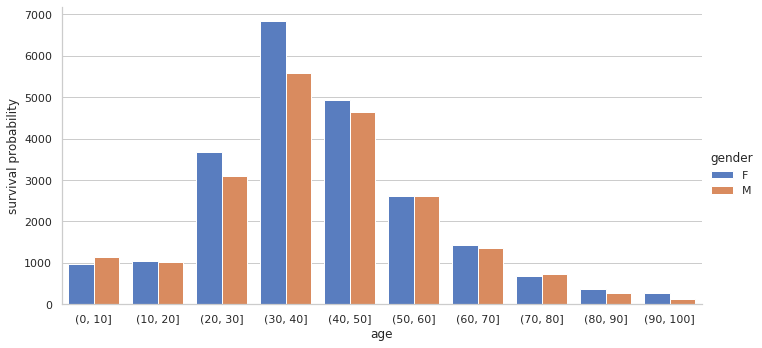

In [152]:
sns.set(style="whitegrid")
g = sns.catplot(x="age", y="count", hue="gender", data=age_sex2,
                height=5, aspect=2, kind="bar", palette="muted")
#g.despine(left=True)
g.set_ylabels("survival probability")